In [ ]:
import csv
import numpy as np
import os.path
from os import path
import os
from scipy.io import wavfile
import scipy.io
import matplotlib.pyplot as plt
import pandas as pd
import sys
from keras.datasets import mnist
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras import layers
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D
from keras import Input, Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras import regularizers
from keras.models import load_model
from keras.callbacks import TensorBoard
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import precision_recall_curve, roc_curve, accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import pickle
import os
import numpy as np
from shutil import copyfile
import numpy as np
from sklearn.model_selection import train_test_split
from shutil import rmtree
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import efficientnet.keras as efn
from tensorflow.keras.callbacks import Callback
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.metrics import Recall, Precision

In [ ]:
os.makedirs('images/NORMAL', exist_ok=True)
os.makedirs('images/PNEUMONIA', exist_ok=True)

base_path = 'C:/Users/maedeh.aghamohamadni/Desktop/chest_xray/chest_xray'

In [ ]:
for path in ['/train', '/test', '/val']:
    for dirname, _, filenames in os.walk(base_path + path):
        dirname = dirname.replace("/", "\\")
        for i, file in enumerate(filenames):
            img_class = dirname.split('\\')[7]
            copyfile(os.path.join(dirname, file),
                     'images/' + img_class + '/' + file)

In [ ]:
for dirname, _, filenames in os.walk('images'):
    if(len(dirname.split("/")) > 1):
        print(dirname + " has " + str(len(filenames)) + " files")

In [ ]:
os.makedirs('train/NORMAL', exist_ok=True)
os.makedirs('train/PNEUMONIA', exist_ok=True)
os.makedirs('train_all/NORMAL', exist_ok=True)
os.makedirs('train_all/PNEUMONIA', exist_ok=True)
os.makedirs('test/NORMAL', exist_ok=True)
os.makedirs('test/PNEUMONIA', exist_ok=True)
os.makedirs('validation/NORMAL', exist_ok=True)
os.makedirs('validation/PNEUMONIA', exist_ok=True)

In [ ]:
train_all, test = train_test_split(os.listdir('images/NORMAL'), test_size=0.2, random_state=42)

for img in train_all:
    copyfile(os.path.join('images/NORMAL/', img), os.path.join('train_all/NORMAL/', img))
for img in test:
    copyfile(os.path.join('images/NORMAL/', img), os.path.join('test/NORMAL/', img))

train, validation = train_test_split(os.listdir('train_all/NORMAL'), test_size=0.25, random_state=42)
for img in train:
    copyfile(os.path.join('train_all/NORMAL/', img), os.path.join('train/NORMAL/', img))
for img in validation:
    copyfile(os.path.join('train_all/NORMAL/', img), os.path.join('validation/NORMAL/', img))

In [ ]:
train_all, test = train_test_split(os.listdir('images/PNEUMONIA'), test_size=0.2, random_state=42)

for img in train_all:
    copyfile(os.path.join('images/PNEUMONIA/', img), os.path.join('train_all/PNEUMONIA/', img))
for img in test:
    copyfile(os.path.join('images/PNEUMONIA/', img), os.path.join('test/PNEUMONIA/', img))

train, validation = train_test_split(os.listdir('train_all/PNEUMONIA'), test_size=0.25, random_state=42)
for img in train:
    copyfile(os.path.join('train_all/PNEUMONIA/', img), os.path.join('train/PNEUMONIA/', img))
for img in validation:
    copyfile(os.path.join('train_all/PNEUMONIA/', img), os.path.join('validation/PNEUMONIA/', img))

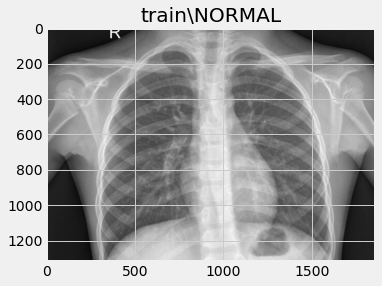

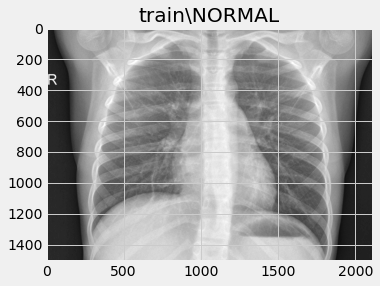

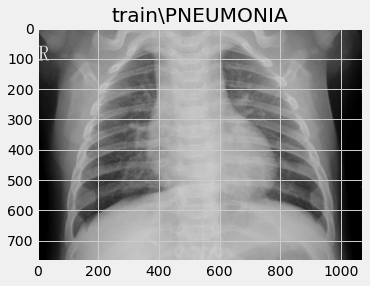

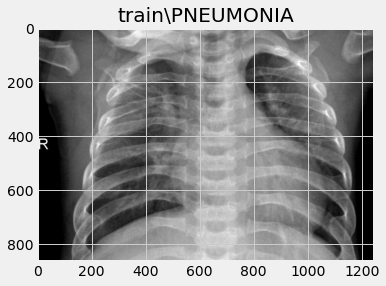

In [ ]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

for dirname, _, filenames in os.walk('train'):
    for i, file in enumerate(filenames):
        if(i > 1):
            break
        plt.imshow(mpimg.imread(os.path.join(dirname, file)), cmap='gray')
        plt.title(dirname.split('/')[0])
        plt.show()

In [ ]:
SIZE = 128
BATCH = 128

# image augmentations
image_gen = ImageDataGenerator(rescale=1./255,
                                rotation_range=30,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                validation_split=0.2,
                                horizontal_flip=True,
                                zoom_range= 0.2,
                                shear_range= 0.2)


val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = image_gen\
    .flow_from_directory('train',
                        target_size=(SIZE, SIZE),
                        class_mode="binary",
                        batch_size=BATCH)

validation_generator = image_gen\
    .flow_from_directory('validation',
                        target_size=(SIZE, SIZE),
                        class_mode="binary",
                        batch_size=BATCH)


test_generator = test_datagen\
    .flow_from_directory('test',
                        target_size=(SIZE, SIZE),
                        class_mode="binary",
                        batch_size=BATCH)

Found 3512 images belonging to 2 classes.
Found 1172 images belonging to 2 classes.
Found 1172 images belonging to 2 classes.


In [ ]:
import efficientnet.keras as efn
from tensorflow.keras.callbacks import Callback
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.metrics import Recall, Precision

In [ ]:
mc = ModelCheckpoint('model.hdf5',
                     save_best_only=True,
                     verbose=0,
                     monitor='val_loss',
                     mode='min')

## Reduce learning rate if it gets stuck in a plateau
rlr = ReduceLROnPlateau(monitor='val_loss',
                        factor=0.3,
                        patience=3,
                        min_lr=0.000001,
                        verbose=1)

In [ ]:
model1 = efn.EfficientNetB2(weights = 'imagenet',
                           include_top = False,
                           input_shape = (SIZE, SIZE, 3))



model1.trainable = False

In [ ]:
model = Sequential([
    model1,
    GlobalAveragePooling2D(),

    Dense(128),
    BatchNormalization(),
    Activation("relu"),
    Dropout(0.3),

    Dense(64),
    BatchNormalization(),
    Activation("relu"),
    Dropout(0.2),

    Dense(1),
    BatchNormalization(),
    Activation("sigmoid"),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnet-b2 (Functional  (None, 4, 4, 1408)       7768562   
 )                                                               
                                                                 
 global_average_pooling2d (G  (None, 1408)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               180352    
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 128)               0         
                                                        

In [ ]:
from sklearn.utils import class_weight

BATCH_SIZE = 128
metrics = [
    tf.keras.metrics.BinaryAccuracy(name="binary_acc"),
    tf.keras.metrics.AUC(name="AUC"),
    tf.keras.metrics.Precision(name="precision"),
    tf.keras.metrics.Recall(name="recall"),
]


In [ ]:
model.compile(optimizer=Adam(learning_rate=1e-3),
              loss='binary_crossentropy',
              metrics=metrics)

callbacks = [
              ModelCheckpoint("model_at_epoch_{epoch}.h5"),
              ReduceLROnPlateau(monitor='val_loss',
                             patience=2,
                             verbose=1,
                             factor=0.07,
                             min_lr=1e-9),
             EarlyStopping(monitor='val_loss', patience=3, verbose=1)
]


In [ ]:
weight_for_0 = (1 / 1266) * ((len(train_all)) / 2.0)
weight_for_1 = (1 / 3418) * ((len(train_all)) / 2.0)

class_weights = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))


Weight for class 0: 1.35
Weight for class 1: 0.50


In [ ]:
history = model.fit(train_generator,
                    epochs=30,
                    batch_size=BATCH_SIZE,
                    callbacks=callbacks,
                    validation_data=validation_generator,
                    class_weight=class_weights)


Epoch 1/30
28/28 [==============================] - 540s 17s/step - loss: 0.3733 - binary_acc: 0.7224 - AUC: 0.8582 - precision: 0.9348 - recall: 0.6660 - val_loss: 0.5413 - val_binary_acc: 0.7244 - val_AUC: 0.9404 - val_precision: 0.9836 - val_recall: 0.6327 - lr: 0.0010
Epoch 2/30
28/28 [==============================] - 279s 10s/step - loss: 0.3171 - binary_acc: 0.8175 - AUC: 0.9338 - precision: 0.9656 - recall: 0.7776 - val_loss: 0.5688 - val_binary_acc: 0.7278 - val_AUC: 0.9526 - val_precision: 0.9891 - val_recall: 0.6339 - lr: 0.0010
Epoch 3/30
28/28 [==============================] - 268s 9s/step - loss: 0.2992 - binary_acc: 0.8525 - AUC: 0.9486 - precision: 0.9719 - recall: 0.8217 - val_loss: 0.5351 - val_binary_acc: 0.7867 - val_AUC: 0.9527 - val_precision: 0.9794 - val_recall: 0.7228 - lr: 0.0010
Epoch 4/30
28/28 [==============================] - 289s 10s/step - loss: 0.2906 - binary_acc: 0.8662 - AUC: 0.9508 - precision: 0.9666 - recall: 0.8459 - val_loss: 0.5598 - val_bina

In [ ]:
model.evaluate(test_generator, batch_size=BATCH_SIZE)


10/10 [==============================] - 83s 9s/step - loss: 0.3343 - binary_acc: 0.8942 - AUC: 0.9879 - precision: 0.9946 - recall: 0.8596


[0.3343134820461273,
 0.894197940826416,
 0.9879037737846375,
 0.9945873022079468,
 0.859649121761322]

In [ ]:
def plot_metrics(history, name, bot=0.0, top=0.0):
    plt.plot(history.history[name])
    plt.plot(history.history['val_'+name])
    plt.title('Model '+name)
    plt.ylabel(name)
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    if top != 0.0:
        plt.ylim([bot, top])
    plt.show()


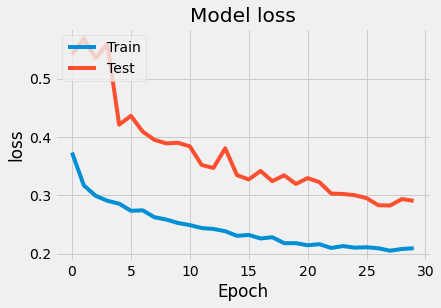

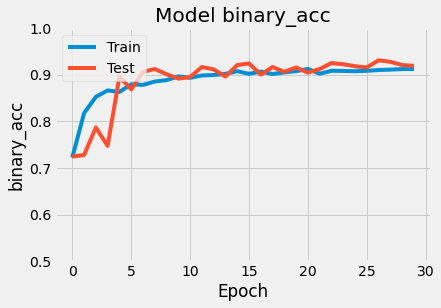

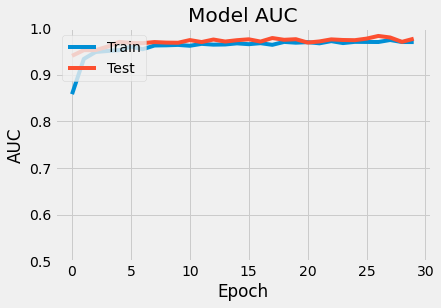

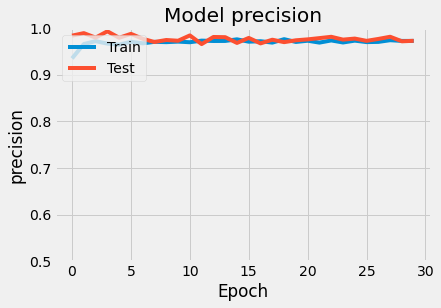

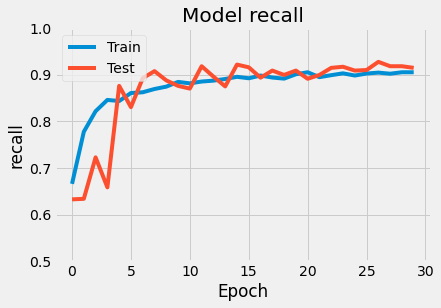

In [ ]:
plot_metrics(history, 'loss')
for i in range(len(metrics)):
    plot_metrics(history, metrics[i].name, 0.5, 1.0)


In [ ]:
model.evaluate(test_generator, batch_size=BATCH_SIZE)

Y_pred = model.predict(test_generator, batch_size=BATCH_SIZE)

10/10 [==============================] - 52s 5s/step


In [ ]:
y_pred = np.rint(Y_pred)

In [ ]:
test_generator.classes

array([0, 0, 0, ..., 1, 1, 1])

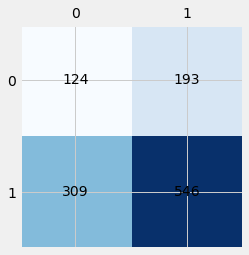

In [ ]:
conf_matrix = confusion_matrix(test_generator.classes, y_pred)

plt.matshow(conf_matrix, cmap=plt.cm.Blues)
for (i, j), z in np.ndenumerate(conf_matrix):
    plt.text(j, i, z, ha='center', va='center')

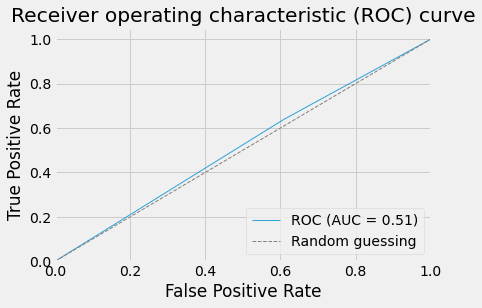

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(test_generator.classes, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, alpha=0.8, label='ROC (AUC = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', label='Random guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()